<a href="https://colab.research.google.com/github/DIPANJAN001/Andrew-Ng-Machine-Learning-Notes/blob/master/finalsolardistribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.optimize import minimize
import random
a= random.randint(650, 1150)
# Define the objective function
def objective(x):
    # x is a vector of decision variables representing the amount of electricity sent to each city
    # Here we define a cost function that takes into account the cost per unit of electricity sent to each city
    # and a penalty term that penalizes sending electricity to cities that already received electricity in the previous run
    cost = 6*x[0] + 6*x[1] + 10*x[2] - a*np.exp(-0.01*prev_energy[0])*(x[0] > 0) \
                                              -a*np.exp(-0.01*prev_energy[1])*(x[1] > 0) \
                                              - a*np.exp(-0.01*prev_energy[2])*(x[2] > 0)
    return cost

# Define the constraints
def constraint1(x):
    # This constraint enforces that the total amount of electricity sent is equal to the amount generated by the power plant
    return np.array([x[0] + x[1] + x[2] - a])

def constraint2(x):
    # This constraint enforces that the amount of electricity sent to each city is non-negative
    return np.array([x[0], x[1], x[2]])

def constraint3(x):
    # This constraint enforces that the amount of electricity sent to each city does not exceed its demand
    return np.array([400 - x[0], 450 - x[1], 600 - x[2]])

# Define the initial guess for the decision variables
x0 = np.array([0, 0, 0])

# Define the bounds for the decision variables
bounds = [(0, None), (0, None), (0, None)]

# Define the constraints as a list of dictionaries
constraints = [{'type': 'eq', 'fun': constraint1},
               {'type': 'ineq', 'fun': constraint2},
               {'type': 'ineq', 'fun': constraint3}]

# Define the previous energy array
prev_energy = np.array([0, 0, 0])

# Use the SLSQP optimizer to find the optimal solution
result = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=constraints)

# Update the previous energy array
prev_energy = np.array([result.x[0], result.x[1], result.x[2]])

# Print the optimal solution
print(result)


     fun: 2055.0000084664807
     jac: array([ 6.,  6., 10.])
 message: 'Optimization terminated successfully'
    nfev: 46
     nit: 10
    njev: 9
  status: 0
 success: True
       x: array([3.42500001e+02, 3.42499997e+02, 2.11662015e-06])


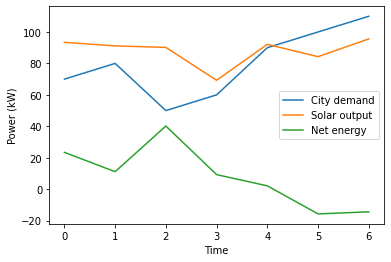

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define system parameters
solar_capacity = 100  # kW
storage_capacity = 50  # kWh
city_demand = np.array([70, 80,50, 60, 90, 100, 110])  # kW

# Define function to calculate net energy generation
def calculate_net_energy(solar_output, storage_level, demand):
    net_energy = solar_output - demand
    if net_energy > 0:
        excess_energy = min(net_energy, storage_level)
        storage_level -= excess_energy
        net_energy -= excess_energy
    else:
        storage_level += min(-net_energy, storage_capacity - storage_level)
    return net_energy, storage_level

# Define function to simulate microgrid operation
def simulate_microgrid():
    # Initialize variables
    solar_output = np.zeros(len(city_demand))
    storage_level = 0
    net_energy = np.zeros(len(city_demand))

    # Simulate microgrid operation for each time step
    for i in range(len(city_demand)):
        # Calculate solar output
        solar_output[i] = solar_capacity * np.random.uniform(0.5, 1.0)

        # Calculate net energy generation
        net_energy[i], storage_level = calculate_net_energy(solar_output[i], storage_level, city_demand[i])

    # Plot results
    plt.plot(city_demand, label='City demand')
    plt.plot(solar_output, label='Solar output')
    plt.plot(net_energy, label='Net energy')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Power (kW)')
    plt.show()

# Simulate microgrid operation
simulate_microgrid()


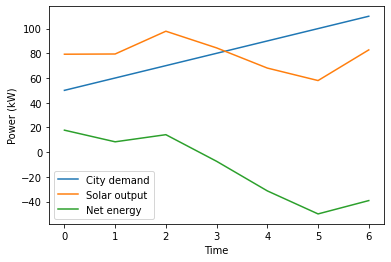

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define system parameters
solar_capacity = 100  # kW
storage_capacity = 200  # kWh
city_demand = np.array([50, 60, 70, 80, 90, 100, 110])  # kW
storage_charge_rate = 0.5  # kW
storage_discharge_rate = 0.5  # kW
inverter_efficiency = 0.9
battery_efficiency = 0.95
solar_efficiency = 0.95

# Define function to calculate net energy generation
def calculate_net_energy(solar_output, storage_level, demand):
    # Calculate power available from battery
    battery_output = min(storage_level, storage_discharge_rate)
    # Calculate net energy generation from solar and battery
    net_energy = (solar_output * solar_efficiency + battery_output * battery_efficiency) * inverter_efficiency - demand
    # Calculate energy flows to and from battery
    if net_energy > 0:
        storage_charge = min(net_energy / battery_efficiency, storage_capacity - storage_level, storage_charge_rate)
        storage_level += storage_charge
    else:
        storage_discharge = min(-net_energy * battery_efficiency, storage_level, storage_discharge_rate)
        storage_level -= storage_discharge
    return net_energy, storage_level

# Define function to simulate microgrid operation
def simulate_microgrid():
    # Initialize variables
    solar_output = np.zeros(len(city_demand))
    storage_level = 0
    net_energy = np.zeros(len(city_demand))

    # Simulate microgrid operation for each time step
    for i in range(len(city_demand)):
        # Calculate solar output
        solar_output[i] = solar_capacity * np.random.uniform(0.5, 1.0)

        # Calculate net energy generation
        net_energy[i], storage_level = calculate_net_energy(solar_output[i], storage_level, city_demand[i])

    # Plot results
    plt.plot(city_demand, label='City demand')
    plt.plot(solar_output, label='Solar output')
    plt.plot(net_energy, label='Net energy')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Power (kW)')
    plt.show()

# Simulate microgrid operation
simulate_microgrid()


In [ ]:
import random

# Define microgrid components
solar_capacity = 10  # kW
storage_capacity = 20  # kWh
city_demand_profile = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # kW
alpha = 0.5  # Weight for distribution cost
beta = 0.5  # Weight for transmission cost

# Initialize microgrid state
solar_output = 0
storage_level = 0
city_demand = 0
net_energy_command = 0

# Define communication protocol
def communicate_microgrid_central_controller(microgrid_info):
    # Placeholder for communication protocol - just returns zero net energy command for now
    return 0

# Define optimal distribution algorithm
def optimize_distribution(city_demand, solar_output):
    # Placeholder for optimal distribution algorithm - just returns city demand for now
    return city_demand

# Define helper functions
def get_solar_output(solar_capacity):
    # Return a random value between 0 and the solar capacity
    return random.uniform(0, solar_capacity)

def update_storage_level(storage_capacity, solar_output, city_demand, net_energy_command, storage_level):
    # Calculate net power flow into/out of the storage
    net_power = solar_output - city_demand - net_energy_command

    # Calculate new storage level
    storage_level = max(min(storage_capacity, storage_level + net_power), 0)

    return storage_level

def calculate_transmission_cost(net_energy, net_energy_command):
    # Placeholder for transmission cost calculation - just returns zero for now
    return 0

# Simulate microgrid operation over time
for i in range(len(city_demand_profile)):
    # Update microgrid state
    city_demand = city_demand_profile[i]
    solar_output = get_solar_output(solar_capacity)
    storage_level = update_storage_level(storage_capacity, solar_output, city_demand, net_energy_command, storage_level)

    # Optimize distribution and get net energy command
    optimal_city_demand = optimize_distribution(city_demand, solar_output)
    net_energy_command = optimal_city_demand - solar_output

    # Exchange information with central controller and get optimal net energy command
    microgrid_info = {'city_demand': city_demand, 'solar_output': solar_output, 'storage_level': storage_level}
    net_energy_command = communicate_microgrid_central_controller(microgrid_info)

    # Apply net energy command to microgrid and calculate energy flows
    net_energy = max(min(net_energy_command + storage_level - solar_output, storage_capacity), -city_demand)
    transmission_cost = calculate_transmission_cost(net_energy, net_energy_command)
    distribution_cost = alpha * (optimal_city_demand - city_demand)**2

    # Calculate total cost
    total_cost = beta * transmission_cost + distribution_cost

    # Print simulation results
    print(f"Time step {i+1}: City demand = {city_demand} kW, Solar output = {solar_output} kW, Storage level = {storage_level} kWh, Optimal city demand = {optimal_city_demand} kW, Net energy command = {net_energy_command} kW, Net energy = {net_energy} kWh, Transmission cost = {transmission_cost} $, Distribution cost = {distribution_cost} $, Total cost = {total_cost} $")


Time step 1: City demand = 10 kW, Solar output = 5.667881227816764 kW, Storage level = 0 kWh, Optimal city demand = 10 kW, Net energy command = 0 kW, Net energy = -5.667881227816764 kWh, Transmission cost = 0 $, Distribution cost = 0.0 $, Total cost = 0.0 $
Time step 2: City demand = 20 kW, Solar output = 3.437574814341432 kW, Storage level = 0 kWh, Optimal city demand = 20 kW, Net energy command = 0 kW, Net energy = -3.437574814341432 kWh, Transmission cost = 0 $, Distribution cost = 0.0 $, Total cost = 0.0 $
Time step 3: City demand = 30 kW, Solar output = 1.403242801953044 kW, Storage level = 0 kWh, Optimal city demand = 30 kW, Net energy command = 0 kW, Net energy = -1.403242801953044 kWh, Transmission cost = 0 $, Distribution cost = 0.0 $, Total cost = 0.0 $
Time step 4: City demand = 40 kW, Solar output = 2.7612151633783064 kW, Storage level = 0 kWh, Optimal city demand = 40 kW, Net energy command = 0 kW, Net energy = -2.7612151633783064 kWh, Transmission cost = 0 $, Distribution

In [ ]:
import random

# Define microgrid components
solar_capacity = 10  # kW
storage_capacity = 20  # kWh
city_demand_profile = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # kW
alpha = 0.5  # Weight for distribution cost
beta = 0.5  # Weight for transmission cost

# Initialize microgrid state
solar_output = 0
storage_level = 0
city_demand = 0
net_energy_command = 0

# Define communication protocol
def communicate_microgrid_central_controller(microgrid_info):
    # Placeholder for communication protocol - just returns zero net energy command for now
    return 0

# Define optimal distribution algorithm
def optimize_distribution(city_demand, solar_output):
    # Calculate the net power demand
    net_power_demand = city_demand - solar_output

    # Check if there is excess power from solar
    if net_power_demand < 0:
        return city_demand

    # Calculate the percentage of city demand that can be satisfied by solar
    solar_percentage = solar_output / city_demand

    # Determine the optimal city demand by scaling the original demand by the solar percentage
    optimal_city_demand = city_demand * solar_percentage

    return optimal_city_demand

# Define helper functions
def get_solar_output(solar_capacity):
    # Return a random value between 0 and the solar capacity
    return random.uniform(0, solar_capacity)

def update_storage_level(storage_capacity, solar_output, city_demand, net_energy_command, storage_level):
    # Calculate net power flow into/out of the storage
    net_power = solar_output - city_demand - net_energy_command

    # Calculate new storage level
    storage_level = max(min(storage_capacity, storage_level + net_power), 0)

    return storage_level

def calculate_transmission_cost(net_energy, net_energy_command):
    # Placeholder for transmission cost calculation - just returns zero for now
    return 0

# Simulate microgrid operation over time
for i in range(len(city_demand_profile)):
    # Update microgrid state
    city_demand = city_demand_profile[i]
    solar_output = get_solar_output(solar_capacity)
    storage_level = update_storage_level(storage_capacity, solar_output, city_demand, net_energy_command, storage_level)

    # Optimize distribution and get net energy command
    optimal_city_demand = optimize_distribution(city_demand, solar_output)
    net_energy_command = optimal_city_demand - solar_output

    # Exchange information with central controller and get optimal net energy command
    microgrid_info = {'city_demand': city_demand, 'solar_output': solar_output, 'storage_level': storage_level}
    net_energy_command = communicate_microgrid_central_controller(microgrid_info)

    # Apply net energy command to microgrid and calculate energy flows
    net_energy = max(min(net_energy_command + storage_level - solar_output, storage_capacity), -city_demand)
    transmission_cost = calculate_transmission_cost(net_energy, net_energy_command)
    distribution_cost = alpha * (optimal_city_demand - city_demand)**2

    # Calculate total cost
    total_cost = beta * transmission_cost + distribution_cost

    # Print simulation results
    print(f"Time step {i+1}: City demand = {city_demand} kW, Solar output = {solar_output} kW, Storage level = {storage_level} kWh")


Time step 1: City demand = 10 kW, Solar output = 4.224997950977098 kW, Storage level = 0 kWh
Time step 2: City demand = 20 kW, Solar output = 0.47470664188265177 kW, Storage level = 0 kWh
Time step 3: City demand = 30 kW, Solar output = 6.474259108176678 kW, Storage level = 0 kWh
Time step 4: City demand = 40 kW, Solar output = 9.768916033326349 kW, Storage level = 0 kWh
Time step 5: City demand = 50 kW, Solar output = 4.83868869164594 kW, Storage level = 0 kWh
Time step 6: City demand = 60 kW, Solar output = 4.759093667618974 kW, Storage level = 0 kWh
Time step 7: City demand = 70 kW, Solar output = 4.673133531420735 kW, Storage level = 0 kWh
Time step 8: City demand = 80 kW, Solar output = 4.012929680485334 kW, Storage level = 0 kWh
Time step 9: City demand = 90 kW, Solar output = 1.4600703835758355 kW, Storage level = 0 kWh
Time step 10: City demand = 100 kW, Solar output = 3.199340038058657 kW, Storage level = 0 kWh


In [ ]:
import random

# Define microgrid components
solar_capacity = 100  # kW
storage_capacity = 40  # kWh
city_demand_profile = [50, 60, 70, 80,10, 20, 30, 40, 90, 100, 70, 80,10, 20, 30, 40, 90, 20, 30, 40, 90, 20, 30, 40, 90, 100, 70, 80,10, 20, 30, 40, 90,60, 70, 80,10, 20, 30]  # kW
alpha = 0.5  # Weight for distribution cost
beta = 0.5  # Weight for transmission cost

# Initialize microgrid state
solar_output = 0
storage_level = 0
city_demand = 0
net_energy_command = 0

# Define communication protocol
def communicate_microgrid_central_controller(microgrid_info):
    # Placeholder for communication protocol - just returns zero net energy command for now
    return 0

# Define optimal distribution algorithm
def optimize_distribution(city_demand, solar_output):
    # Calculate the net power demand
    net_power_demand = city_demand - solar_output

    # Check if there is excess power from solar
    if net_power_demand < 0:
        return city_demand

    # Calculate the percentage of city demand that can be satisfied by solar
    solar_percentage = solar_output / city_demand

    # Determine the optimal city demand by scaling the original demand by the solar percentage
    optimal_city_demand = city_demand * solar_percentage

    return optimal_city_demand

# Define helper functions
def get_solar_output(solar_capacity):
    # Return a random value between 0 and the solar capacity
    return random.uniform(0, solar_capacity)

def update_storage_level(storage_capacity, solar_output, city_demand, net_energy_command, storage_level):
    # Calculate net power flow into/out of the storage
    net_power = solar_output - city_demand - net_energy_command

    # Calculate new storage level
    storage_level = max(min(storage_capacity, storage_level + net_power), 0)

    return storage_level

def calculate_transmission_cost(net_energy, net_energy_command):
    net_energy_flow = net_energy - net_energy_command
    transmission_cost = abs(net_energy_flow) * beta
    return transmission_cost


# Simulate microgrid operation over time
for i in range(len(city_demand_profile)):
    # Update microgrid state
    city_demand = city_demand_profile[i]
    solar_output = get_solar_output(solar_capacity)
    storage_level = update_storage_level(storage_capacity, solar_output, city_demand, net_energy_command, storage_level)

    # Optimize distribution and get net energy command
    optimal_city_demand = optimize_distribution(city_demand, solar_output)
    net_energy_command = optimal_city_demand - solar_output

    # Exchange information with central controller and get optimal net energy command
    microgrid_info = {'city_demand': city_demand, 'solar_output': solar_output, 'storage_level': storage_level}
    net_energy_command = communicate_microgrid_central_controller(microgrid_info)

    # Apply net energy command to microgrid and calculate energy flows
    net_energy = max(min(net_energy_command + storage_level - solar_output, storage_capacity), -city_demand)
    transmission_cost = calculate_transmission_cost(net_energy, net_energy_command)
    distribution_cost = alpha * (optimal_city_demand - city_demand)**2

    # Calculate total cost
    total_cost = beta * transmission_cost + distribution_cost

    # Print simulation results
    print(f"Time step {i+1}: City demand = {city_demand} kW, Solar output = {solar_output} kW, Storage level = {storage_level} kWh, Net energy command = {net_energy_command} kW, Net energy = {net_energy} kW, Transmission cost = {transmission_cost}, Distribution cost ={distribution_cost}")


Time step 1: City demand = 50 kW, Solar output = 57.48277064740071 kW, Storage level = 7.482770647400713 kWh, Net energy command = 0 kW, Net energy = -50.0 kW, Transmission cost = 25.0, Distribution cost =0.0
Time step 2: City demand = 60 kW, Solar output = 71.35074189340827 kW, Storage level = 18.833512540808982 kWh, Net energy command = 0 kW, Net energy = -52.51722935259929 kW, Transmission cost = 26.258614676299644, Distribution cost =0.0
Time step 3: City demand = 70 kW, Solar output = 61.238036385845874 kW, Storage level = 10.071548926654856 kWh, Net energy command = 0 kW, Net energy = -51.16648745919102 kW, Transmission cost = 25.58324372959551, Distribution cost =38.38600318788042
Time step 4: City demand = 80 kW, Solar output = 60.12228753533836 kW, Storage level = 0 kWh, Net energy command = 0 kW, Net energy = -60.12228753533836 kW, Transmission cost = 30.06114376766918, Distribution cost =197.56172641388238
Time step 5: City demand = 10 kW, Solar output = 77.12695637774094 kW

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define time array
t = np.arange(0, 24, 0.25)  # 96 time steps in a day

# Define solar output function (in kW)
def get_solar_output(t):
    # solar output peaks at noon
    return 5 * np.sin(np.pi * (t - 6)) + 2

# Define city network demand function (in kW)
def get_city_demand(t):
    # demand peaks in the morning and evening
    return 20 * np.cos(np.pi * (t - 12)) + 50

# Define microgrid parameters
storage_capacity = 100  # kWh
storage_efficiency = 0.9
transmission_cost_rate = 0.1  # $/kWh

# Initialize storage level
storage_level = 0

# Initialize empty arrays to store data
solar_output = np.zeros_like(t)
city_demand = np.zeros_like(t)
net_energy = np.zeros_like(t)
net_energy_command = np.zeros_like(t)
storage_level_array = np.zeros_like(t)
transmission_cost_array = np.zeros_like(t)

# Simulate microgrid operation for each time step
for i in range(len(t)):
    # Get solar output and city demand
    solar_output[i] = get_solar_output(t[i])
    city_demand[i] = get_city_demand(t[i])

    # Calculate net energy and net energy command
    net_energy[i] = solar_output[i] - city_demand[i]
    net_energy_command[i] = get_central_controller_command(net_energy[i], storage_level)

    # Update storage level
    storage_level = update_storage_level(net_energy[i], net_energy_command[i], storage_level, storage_capacity, storage_efficiency)

    # Calculate transmission cost
    transmission_cost_array[i] = calculate_transmission_cost(net_energy[i], net_energy_command[i])

    # Store current storage level
    storage_level_array[i] = storage_level

# Create a time series plot of the microgrid operation
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(t, solar_output, label='Solar Output')
ax.plot(t, city_demand, label='City Demand')
ax.plot(t, net_energy, label='Net Energy')
#ax.plot(t, net_energy_command, label='Net Energy Command')
ax.plot(t, storage_level_array, label='Storage Level')
#ax.plot(t, transmission_cost_array, label='Transmission Cost')
ax.set_xlabel('Time (hours)')
ax.set_ylabel('Power (kW) / Energy (kWh)')
ax.legend()
plt.show()


NameError: ignored

In [ ]:
!pip install gurobipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 39.7 MB/s eta 0:00:00


### In this code, we first generate random demand for 10 homes and a random solar output for a certain hour. We then create a Gurobi model and create a variable for the solar power distribution to each home. We set the objective of the model to minimize the sum of the squared differences between the distributed power and the demand, and add a constraint that the sum of the distributed power equals the solar output. We then optimize the model and print the optimized distribution of solar power to each home.

In [ ]:
import numpy as np
from gurobipy import *

# Generate random demand for 10 homes
demand = np.random.randint(1, 3, size=10)
print(demand)
# Generate random solar output for a certain hour
solar_output = np.random.randint(3, 15)
print(solar_output)
# Create Gurobi model
m = Model()

# Create variable for solar power distribution to each home
x = m.addVars(10, name="x")

# Set objective to minimize the sum of the squared differences between the solar output and the distributed power
m.setObjective(quicksum((x[i] - demand[i]) ** 2 for i in range(10)), GRB.MINIMIZE)

# Add constraint that the sum of the distributed power equals the solar output
m.addConstr(quicksum(x[i] for i in range(10)) == solar_output)

# Optimize the model
m.optimize()

# Print the optimized distribution of solar power to each home
for i in range(10):
    print(f"Home {i+1}: {x[i].x:.2f} units of solar power")


[1 1 1 1 2 1 1 2 1 2]
5
Restricted license - for non-production use only - expires 2024-10-28
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (linux64)

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 1 rows, 10 columns and 10 nonzeros
Model fingerprint: 0x1154facf
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 4e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+00, 5e+00]
Presolve time: 0.02s
Presolved: 1 rows, 10 columns, 10 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 0.000e+00
 Factor NZ  : 1.000e+00
 Factor Ops : 1.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Pri

In [ ]:
 global storage

In [ ]:
storage=0

In [ ]:
for i in range(1):
      storage=3
      demand = np.random.randint(4, 9, size=10)
      #print("Demand",demand)
# Generate random solar output for a certain hour

      solar_output = min(np.random.randint(55, 75),np.sum(demand))

# Create Gurobi model
      m = Model()

# Create variable for solar power distribution to each home
      x = m.addVars(10, name="x")

# Set objective to minimize the sum of the squared differences between the solar output and the distributed power
      m.setObjective(quicksum((x[i] - demand[i]) ** 2 for i in range(10)), GRB.MINIMIZE)

# Add constraint that the sum of the distributed power equals the solar output
      m.addConstr(quicksum(x[i] for i in range(10)) == solar_output)

# Optimize the model
      m.optimize()

# Print the optimized distribution of solar power to each home
      for i in range(10):
           print(f"Home {i+1}: {x[i].x:.2f} units of solar power")
      print("*****************************************")
      print("Demand",demand)
      print("Demand",np.sum(demand))
      print("Power",solar_output)


Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (linux64)

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 1 rows, 10 columns and 10 nonzeros
Model fingerprint: 0x3c8d2a69
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [8e+00, 2e+01]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e+01, 6e+01]
Presolve time: 0.02s
Presolved: 1 rows, 10 columns, 10 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 0.000e+00
 Factor NZ  : 1.000e+00
 Factor Ops : 1.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.50001490e+06 -2.56098510e+06  1.00e+04 0.00e+00  1.01e

In [ ]:
for i in range(10):
      storage=3
      demand = np.random.randint(1, 3, size=10)
      print("Demand",np.sum(demand))
# Generate random solar output for a certain hour

      solar_output = min(np.random.randint(9, 15),np.sum(demand))

      print(solar_output)
      if(solar_output<np.sum(demand)):
          solar_output+=storage
      print("Power",solar_output)
# Create Gurobi model
      m = Model()

# Create variable for solar power distribution to each home
      x = m.addVars(10, name="x")

# Set objective to minimize the sum of the squared differences between the solar output and the distributed power
      m.setObjective(quicksum((x[i] - demand[i]) ** 2 for i in range(10)), GRB.MINIMIZE)

# Add constraint that the sum of the distributed power equals the solar output
      m.addConstr(quicksum(x[i] for i in range(10)) == solar_output)

# Optimize the model
      m.optimize()

# Print the optimized distribution of solar power to each home
      for i in range(10):
           print(f"Home {i+1}: {x[i].x:.2f} units of solar power")
      print("*****************************************")



Demand 15
11
Power 14
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (linux64)

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 1 rows, 10 columns and 10 nonzeros
Model fingerprint: 0x136f4567
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 4e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+01, 1e+01]
Presolve time: 0.02s
Presolved: 1 rows, 10 columns, 10 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 0.000e+00
 Factor NZ  : 1.000e+00
 Factor Ops : 1.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.49900260e+06 -2.51399460e+06  1.

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (linux64)

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 1 rows, 10 columns and 10 nonzeros
Model fingerprint: 0xc8ef67a2
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 2e+01]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [8e+00, 8e+00]
Presolve time: 0.03s
Presolved: 1 rows, 10 columns, 10 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 0.000e+00
 Factor NZ  : 1.000e+00
 Factor Ops : 1.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.46022560e+06 -2.50771040e+06  1.00e+04 0.00e+00  9.97e

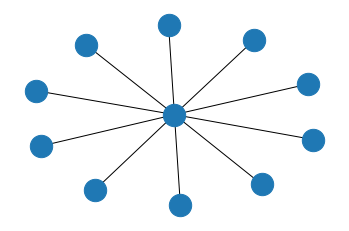

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from gurobipy import *

# Generate random demand for 10 homes
demand = np.random.randint(1, 10, size=10)

# Generate random solar output for a certain hour
solar_output = np.random.randint(1, 15)

# Create Gurobi model
m = Model()

# Create variable for solar power distribution to each home
x = m.addVars(10, name="x")

# Set objective to minimize the sum of the squared differences between the solar output and the distributed power
m.setObjective(quicksum((x[i] - demand[i]) ** 2 for i in range(10)), GRB.MINIMIZE)

# Add constraint that the sum of the distributed power equals the solar output
m.addConstr(quicksum(x[i] for i in range(10)) == solar_output)

# Optimize the model
m.optimize()

# Create NetworkX graph
G = nx.Graph()

# Add nodes for homes
for i in range(10):
    G.add_node(f"Home {i+1}", demand=demand[i], solar_power=x[i].x)

# Add node for solar output
G.add_node("Solar Output", solar_power=solar_output)

# Add edges from solar output to each home
for i in range(10):
    G.add_edge("Solar Output", f"Home {i+1}")

# Draw the graph
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_size=500)
#nx.draw_networkx_labels(G, pos, labels={node: f"{node}\n(demand: {G.nodes[node]['demand']}, solar power: {G.nodes[node]['solar_power']:.2f})" for node in G.nodes()})
nx.draw_networkx_edges(G, pos)
plt.axis('off')
plt.show()


Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (linux64)

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 1 rows, 10 columns and 10 nonzeros
Model fingerprint: 0xbf95a3f9
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [8e+00, 2e+01]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [7e+01, 7e+01]
Presolve time: 0.01s
Presolved: 1 rows, 10 columns, 10 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 0.000e+00
 Factor NZ  : 1.000e+00
 Factor Ops : 1.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.50803080e+06 -2.57408760e+06  1.00e+04 0.00e+00  1.01e

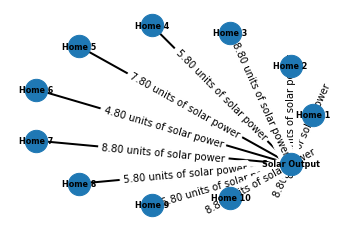

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from gurobipy import *

# Generate random demand for 10 homes
demand = np.random.randint(4, 9, size=10)

# Generate random solar output for a certain hour
solar_output = np.random.randint(55, 75)

# Create Gurobi model
m = Model()

# Create variable for solar power distribution to each home
x = m.addVars(10, name="x")

# Set objective to minimize the sum of the squared differences between the solar output and the distributed power
m.setObjective(quicksum((x[i] - demand[i]) ** 2 for i in range(10)), GRB.MINIMIZE)

# Add constraint that the sum of the distributed power equals the solar output
m.addConstr(quicksum(x[i] for i in range(10)) == solar_output)

# Optimize the model
m.optimize()

# Create a network graph
G = nx.Graph()

# Add nodes for homes
for i in range(10):
    G.add_node(f"Home {i+1}")

# Add edges for solar power distribution
for i in range(10):
    G.add_edge(f"Home {i+1}", "Solar Output", weight=x[i].x)

# Set node positions
pos = nx.circular_layout(G)

# Set edge labels
edge_labels = {(u, v): f"{d['weight']:.2f} units of solar power" for u, v, d in G.edges(data=True)}

# Draw the graph
nx.draw_networkx_nodes(G, pos, node_size=500)
nx.draw_networkx_edges(G, pos, width=2)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, label_pos=0.5)
nx.draw_networkx_labels(G, pos, font_size=8, font_weight="bold")

plt.axis("off")
plt.show()


Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (linux64)

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 1 rows, 10 columns and 10 nonzeros
Model fingerprint: 0x2cab8b6a
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e+00, 2e+01]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [9e+00, 9e+00]
Presolve time: 0.02s
Presolved: 1 rows, 10 columns, 10 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 0.000e+00
 Factor NZ  : 1.000e+00
 Factor Ops : 1.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.45029290e+06 -2.50861710e+06  1.00e+04 0.00e+00  9.96e

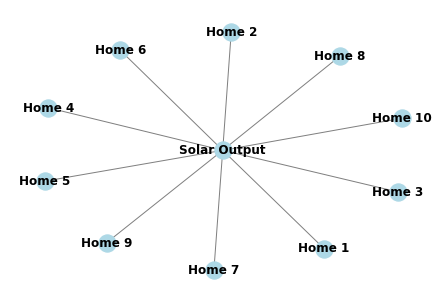

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Generate random demand for 10 homes
demand = np.random.randint(1, 10, size=10)

# Generate random solar output for a certain hour
solar_output = np.random.randint(1, 15)

# Create Gurobi model
m = Model()

# Create variable for solar power distribution to each home
x = m.addVars(10, name="x")

# Set objective to minimize the sum of the squared differences between the solar output and the distributed power
m.setObjective(quicksum((x[i] - demand[i]) ** 2 for i in range(10)), GRB.MINIMIZE)

# Add constraint that the sum of the distributed power equals the solar output
m.addConstr(quicksum(x[i] for i in range(10)) == solar_output)

# Optimize the model
m.optimize()

# Create graph for network visualization
G = nx.Graph()

# Add nodes for each home and label them with their demand and the optimized solar power distribution
for i in range(10):
    G.add_node(f"Home {i+1}", demand=demand[i], solar_power=x[i].x)

# Add edge for the solar power source and label it with the solar output
G.add_node("Solar Output", demand=0, solar_power=solar_output)
for i in range(10):
    G.add_edge(f"Home {i+1}", "Solar Output")

# Draw the network with labels for each node
nx.draw(G, with_labels=True, font_weight='bold', node_color='lightblue', edge_color='gray')

# Show the plot
plt.show()


Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (linux64)

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 1 rows, 10 columns and 10 nonzeros
Model fingerprint: 0xda448a6d
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [8e+00, 2e+01]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e+01, 6e+01]
Presolve time: 0.05s
Presolved: 1 rows, 10 columns, 10 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 0.000e+00
 Factor NZ  : 1.000e+00
 Factor Ops : 1.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.49802330e+06 -2.55895310e+06  1.00e+04 0.00e+00  1.01e

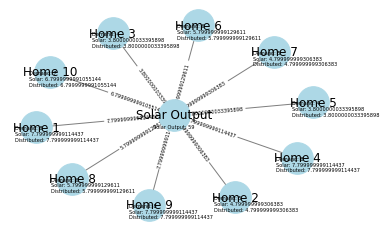

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Generate random demand for 10 homes
demand = np.random.randint(4, 9, size=10)

# Generate random solar output for a certain hour
solar_output = np.random.randint(55, 75)

# Create Gurobi model
m = Model()

# Create variable for solar power distribution to each home
x = m.addVars(10, name="x")

# Set objective to minimize the sum of the squared differences between the solar output and the distributed power
m.setObjective(quicksum((x[i] - demand[i]) ** 2 for i in range(10)), GRB.MINIMIZE)

# Add constraint that the sum of the distributed power equals the solar output
m.addConstr(quicksum(x[i] for i in range(10)) == solar_output)

# Optimize the model
m.optimize()

# Create graph for network visualization
G = nx.Graph()

# Add nodes for each home and label them with their demand and the optimized solar power distribution
for i in range(10):
    G.add_node(f"Home {i+1}", demand=demand[i], solar_power=x[i].x, distributed_power=x[i].x)

# Add edge for the solar power source and label it with the solar output
G.add_node("Solar Output", demand=0, solar_power=solar_output, distributed_power=0)
for i in range(10):
    G.add_edge(f"Home {i+1}", "Solar Output")

# Draw the network with labels for each node
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1000)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")
nx.draw_networkx_edge_labels(G, pos, edge_labels={("Home " + str(i+1), "Solar Output"): x[i].x for i in range(10)}, label_pos=0.3, font_size=5)

# Add labels for demand, solar power, and distributed power
for i in range(10):
    plt.text(pos[f"Home {i+1}"][0]-0.15, pos[f"Home {i+1}"][1]-0.15, f"Demand: {demand[i]}\nSolar: {x[i].x}\nDistributed: {x[i].x}", fontsize=5)

plt.text(pos["Solar Output"][0]-0.15, pos["Solar Output"][1]-0.15, f"Solar Output: {solar_output}", fontsize=5)

plt.axis('off')
plt.show()


Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (linux64)

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 1 rows, 3 columns and 3 nonzeros
Model fingerprint: 0xd1dab428
Model has 3 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+01, 1e+01]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+01, 2e+01]
Presolve time: 0.02s
Presolved: 1 rows, 3 columns, 3 nonzeros
Presolved model has 3 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 0.000e+00
 Factor NZ  : 1.000e+00
 Factor Ops : 1.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   7.52002000e+05 -7.68022000e+05  3.00e+03 0.00e+00  1.01e+06   

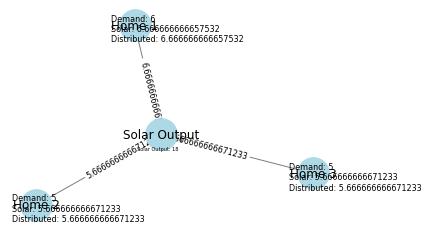

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Generate random demand for 10 homes
demand = np.random.randint(4, 9, size=3)

# Generate random solar output for a certain hour
solar_output = np.random.randint(15,22)

# Create Gurobi model
m = Model()

# Create variable for solar power distribution to each home
x = m.addVars(3, name="x")

# Set objective to minimize the sum of the squared differences between the solar output and the distributed power
m.setObjective(quicksum((x[i] - demand[i]) ** 2 for i in range(3)), GRB.MINIMIZE)

# Add constraint that the sum of the distributed power equals the solar output
m.addConstr(quicksum(x[i] for i in range(3)) == solar_output)

# Optimize the model
m.optimize()

# Create graph for network visualization
G = nx.Graph()

# Add nodes for each home and label them with their demand and the optimized solar power distribution
for i in range(3):
    G.add_node(f"Home {i+1}", demand=demand[i], solar_power=x[i].x, distributed_power=x[i].x)

# Add edge for the solar power source and label it with the solar output
G.add_node("Solar Output", demand=0, solar_power=solar_output, distributed_power=0)
for i in range(3):
    G.add_edge(f"Home {i+1}", "Solar Output")

# Draw the network with labels for each node
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1000)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")
nx.draw_networkx_edge_labels(G, pos, edge_labels={("Home " + str(i+1), "Solar Output"): x[i].x for i in range(3)}, label_pos=0.3, font_size=8)

# Add labels for demand, solar power, and distributed power
for i in range(3):
    plt.text(pos[f"Home {i+1}"][0]-0.15, pos[f"Home {i+1}"][1]-0.15, f"Demand: {demand[i]}\nSolar: {x[i].x}\nDistributed: {x[i].x}", fontsize=8)

plt.text(pos["Solar Output"][0]-0.15, pos["Solar Output"][1]-0.15, f"Solar Output: {solar_output}", fontsize=5)

plt.axis('off')
plt.show()

In [ ]:
import folium
import numpy as np
from gurobipy import *

# Generate random demand for 10 homes
#demand = np.random.randint(5, 9, size=10)
demand=np.random.uniform(low=0.1, high=0.2, size=(10,))
# Generate random solar output for a certain hour
solar_output = min(round(random.uniform(1, 1.5), 2),np.sum(demand))
#forecasting model will be placed here
# Create Gurobi model
m = Model()

# Create variable for solar power distribution to each home
x = m.addVars(10, name="x")

# Set objective to minimize the sum of the squared differences between the solar output and the distributed power
m.setObjective(quicksum((x[i] - demand[i]) ** 2 for i in range(10)), GRB.MINIMIZE)

# Add constraint that the sum of the distributed power equals the solar output
m.addConstr(quicksum(x[i] for i in range(10)) == solar_output)
m.addConstrs(x[i]<= demand[i] for i in range(10))
# Optimize the model
m.optimize()
print(m.getAttr('x', x))
# Create map
map = folium.Map(location=[22.5553, 88.3078], zoom_start=13)

# Add home markers
'''for i in range(3):
    folium.Marker(
        location=[np.random.uniform(37.75, 37.78), np.random.uniform(-122.45, -122.4)],
        popup=f"Home {i+1}: {demand[i]} kW",
        icon=folium.Icon(color="blue")
    ).add_to(map)'''

# Add solar panel marker
folium.Marker(
    location=[np.random.uniform(22.5553,22.5556), np.random.uniform(88.3078,88.308)],
    popup=f"Solar Output: {solar_output} kW",
    icon=folium.Icon(color="green")
).add_to(map)

# Add power lines
'''for i in range(3):
    folium.PolyLine(
        locations=[[np.random.uniform(37.75, 37.78), np.random.uniform(-122.45, -122.4)],
                   [np.random.uniform(37.75, 37.78), np.random.uniform(-122.45, -122.4)]],
        color="red",
        weight=2,
        opacity=0.7
    ).add_to(map)'''

# Add solar power distribution markers
for i in range(10):
    folium.Marker(
        location=[np.random.uniform(22.554,22.552), np.random.uniform(88.305,88.31)],
        popup=f"Demand:{demand[i]} kW Distributed Power: {x[i].x:.2f} kW",
        icon=folium.Icon(color="blue")
    ).add_to(map)

# Display map
map


Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (linux64)

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 11 rows, 10 columns and 20 nonzeros
Model fingerprint: 0x1a1785bb
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-01, 1e+00]
Presolve removed 10 rows and 0 columns
Presolve time: 0.02s
Presolved: 1 rows, 10 columns, 10 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 0.000e+00
 Factor NZ  : 1.000e+00
 Factor Ops : 1.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.49999305e+06 -

In [ ]:
#print(m.getAttr('x', x))
a=m.getAttr('x', x)
optimal_distribution=np.array(a.values())/np.sum(np.array(a.values()))
print(optimal_distribution)

[0.10425368 0.09161159 0.0695276  0.08135393 0.09763863 0.11738465
 0.13521457 0.12499318 0.07185099 0.10617116]


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import random
from collections import deque

# Define the neural network architecture for the DQN
class DQN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define the replay memory for experience replay
class ReplayMemory:
    def __init__(self, capacity):
        self.capacity = capacity
        self.memory = deque(maxlen=capacity)

    def push(self, state, action, reward, next_state):
        self.memory.append((state, action, reward, next_state))

    def sample(self, batch_size):
        batch = random.sample(self.memory, batch_size)
        state, action, reward, next_state = zip(*batch)
        return state, action, reward, next_state

    def __len__(self):
        return len(self.memory)

# Define the Deep Q-Learning agent
class DQNAgent:
    def __init__(self, input_dim, hidden_dim, output_dim, lr, gamma, epsilon_start, epsilon_end, epsilon_decay):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.lr = lr
        self.gamma = gamma
        self.epsilon = epsilon_start
        self.epsilon_end = epsilon_end
        self.epsilon_decay = epsilon_decay
        self.model = DQN(input_dim, hidden_dim, output_dim)
        self.target_model = DQN(input_dim, hidden_dim, output_dim)
        self.optimizer = optim.Adam(self.model.parameters(), lr=lr)
        self.memory = ReplayMemory(capacity=10000)
        self.batch_size = 32
        self.update_target_freq = 100

    def select_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.uniform(size=self.output_dim)
        state = torch.from_numpy(state).float().unsqueeze(0)
        with torch.no_grad():
            q_values = self.model(state)
        return q_values.squeeze().numpy()

    def update_epsilon(self):
        self.epsilon = max(self.epsilon_end, self.epsilon * self.epsilon_decay)

    def optimize_model(self):
        if len(self.memory) < self.batch_size:
           return

        states, actions, rewards, next_states = self.memory.sample(self.batch_size)

        states = torch.FloatTensor(states)
        actions = torch.LongTensor(actions).unsqueeze(1)  # Convert actions to a LongTensor and unsqueeze the dimension
        rewards = torch.FloatTensor(rewards)
        next_states = torch.FloatTensor(next_states)

        q_values = self.model(states).gather(1, actions)  # Remove the unsqueeze(1) when gathering q_values
        next_q_values = self.target_model(next_states).max(1)[0].unsqueeze(1)
        expected_q_values = rewards.unsqueeze(1) + self.gamma * next_q_values

        loss = F.smooth_l1_loss(q_values, expected_q_values.detach())

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        self.update_target_model()


    def update_target_model(self):
        if self.update_target_freq > 0 and self.memory.steps % self.update_target_freq == 0:
            self.target_model.load_state_dict(self.model.state_dict())

    def remember(self, state, action, reward, next_state):
        self.memory.push(state, action, reward, next_state)

# Define the solar power prediction function
def predict_solar_power(distribution_fractions, nn):
    return nn.forward(distribution_fractions)

# Define the simulation environment for solar power distribution
class SolarPowerDistributionEnvironment:
    def __init__(self, num_houses, nn):
        self.num_houses = num_houses
        self.nn = nn
        self.demand = np.array([50, 80, 60, 70])

    def reset(self):
        self.distribution_fractions = np.random.rand(self.num_houses)
        return self.distribution_fractions

    def step(self, action):
        self.distribution_fractions = action
        prediction = predict_solar_power(self.distribution_fractions.reshape(1, -1), self.nn)
        energy_waste = np.sum(np.maximum(prediction - self.demand, 0))
        reward = -energy_waste
        done = False
        return self.distribution_fractions, reward, done

# Training setup
num_houses = 4
input_dim = num_houses
hidden_dim = 10
output_dim = num_houses
lr = 0.001
gamma = 0.99
epsilon_start = 1.0
epsilon_end = 0.01
epsilon_decay = 0.995
num_episodes = 1000

# Create an instance of the neural network
neural_network = NeuralNetwork(input_dim, hidden_dim, output_dim)

# Create the solar power distribution environment
environment = SolarPowerDistributionEnvironment(num_houses, neural_network)

# Create the DQN agent
agent = DQNAgent(input_dim, hidden_dim, output_dim, lr, gamma, epsilon_start, epsilon_end, epsilon_decay)

# Training loop
for episode in range(num_episodes):
    state = environment.reset()
    done = False
    total_reward = 0

    while not done:
        action = agent.select_action(state)
        next_state, reward, done = environment.step(action)
        agent.remember(state, action, reward, next_state)
        agent.optimize_model()
        agent.update_epsilon()

        state = next_state
        total_reward += reward

    print(f"Episode: {episode + 1} - Reward: {total_reward}")

# Extract the learned optimal distribution fractions
optimal_distribution_fractions = agent.select_action(state)

# Print the optimal distribution fractions
print("Optimal Distribution Fractions:", optimal_distribution_fractions)


TypeError: ignored